###Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval [0,5] in increments of 0.1 and for an initial solution of $S_0$=\begin{bmatrix} 1\\ 0\\\end{bmatrix}
### For the model parameters using $\sqrt{\frac{g}{l}} $= 4. Plot the approximate solution on a single graph.

In [6]:
import numpy as np 
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use ('seaborn-poster')

%matplotlib inline

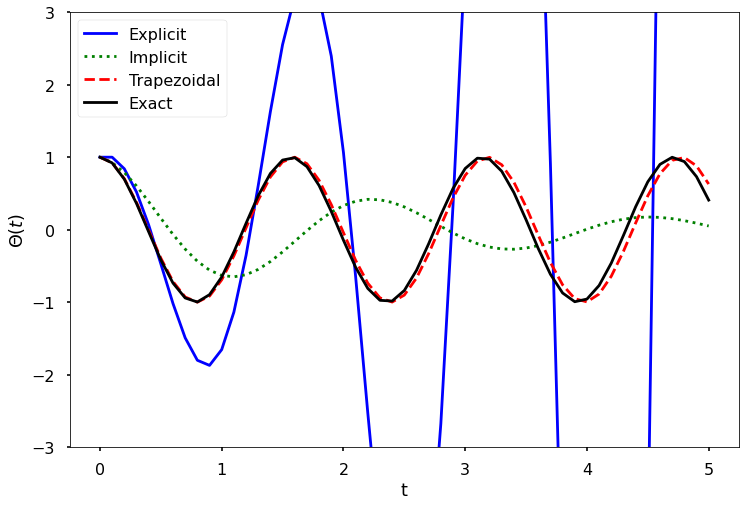

In [10]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation feq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
                [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
                   [w**2*h/2,1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
                           [w**2*h/2,1]])), np.array(
                               [[1,h/2], [-w**2*h/2,1]]))
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
  s_e[j+1, :] = np.dot(m_e, s_e[j,:])
  s_i[j+1, :] = np.dot(m_i, s_i[j,:])
  s_t[j+1, :] = np.dot(m_t, s_t[j,:])

plt.figure(figsize = (12,8))
plt.plot(t, s_e[:,0],'b')
plt.plot(t, s_i[:,0], 'g:')
plt.plot(t, s_t[:,0], 'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3,3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

###Consider the ODE $\frac{𝑑𝑆(𝑡)}{𝑑𝑡}=cos(𝑡) $for an initial value $𝑆_0=0$. The exact solution to this problem is 𝑆(𝑡)=sin(𝑡). Use solve_ivp to approximate the solution to this initial value problem over the interval [0,𝜋]. Plot the approximate solution versus the exact solution and the relative error over time.

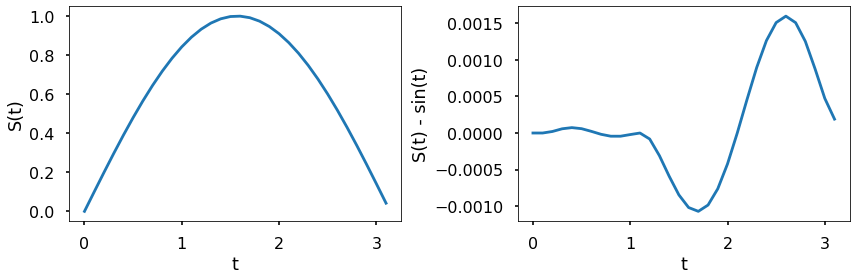

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use( 'seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12 ,4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

###Using the rtol and atol to make the difference between the approximate and exact solution is less than 1e-7.

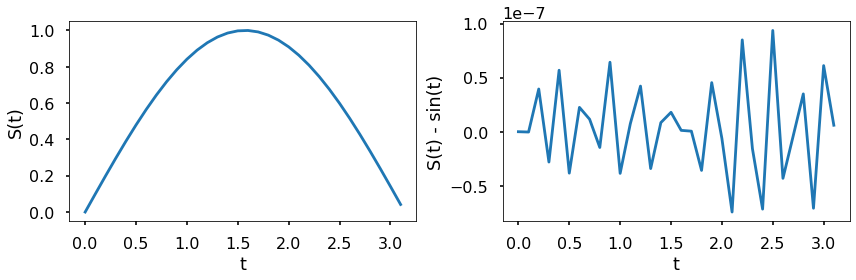

In [21]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()
